# Pyber Data Analysis Highlights:

* Urban areas have the highest numbers of rides per city with 68 percent of total rides.
* Rural areas have higher average fares per ride suggesting longer distances traveled each trip.
* Suburban areas show a large opportunity based on the higher share of rides at 26 percent with only 17 percent of drivers supporting the area



In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
data = pd.merge(ride, city, on='city', how='left')
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


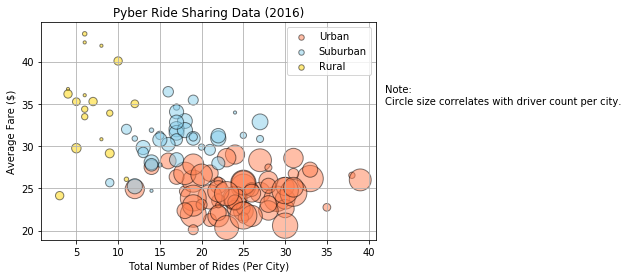

In [4]:
dataGroups = data.groupby('city')
rides = dataGroups['ride_id'].count()
avgFare = dataGroups['fare'].mean()
drivers = dataGroups['driver_count'].mean()
cityType = dataGroups['type'].describe()

datatable = pd.merge(rides, avgFare, on='city', how='outer')
datatable = pd.merge(datatable, drivers, on='city', how='outer')
datatable = pd.merge(datatable, cityType['top'], on='city', how='left')
datatable = datatable.rename(columns={'ride_id':'rides', 'top':'type'})

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.text(x=42, y=35, s="Note: \nCircle size correlates with driver count per city.")

urban = datatable.loc[datatable['type']=='Urban']
suburban = datatable.loc[datatable['type']=='Suburban']
rural = datatable.loc[datatable['type']=='Rural']

urban = plt.scatter(urban['rides'], urban['fare'], s=urban['driver_count']*10, linewidth=1, color="coral", label="Urban", alpha=0.5, edgecolor='black')
suburban = plt.scatter(suburban['rides'], suburban['fare'], s=suburban['driver_count']*10, linewidth=1, color="skyblue", label="Suburban", alpha=0.5, edgecolor='black')
rural = plt.scatter(rural['rides'], rural['fare'], s=rural['driver_count']*10, color="gold", linewidth=1, label="Rural", alpha=0.5, edgecolor='black')
lgnd = plt.legend(handles=[urban, suburban, rural], loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.savefig("Images/RideShare.png")
plt.show()


## Total Fares by City Type

In [5]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


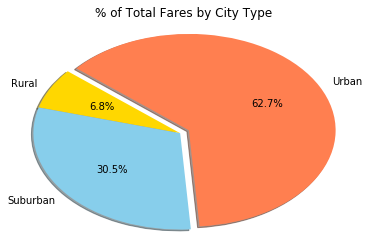

In [6]:
total_fares = data.groupby('type').sum()
total_fares = total_fares['fare']
total_fares = total_fares.reset_index()
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(total_fares['fare'], explode=explode, labels=total_fares['type'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)
plt.title("% of Total Fares by City Type")
plt.axis("auto")
plt.savefig("Images/FaresPie.png")
plt.show()



## Total Rides by City Type

In [7]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


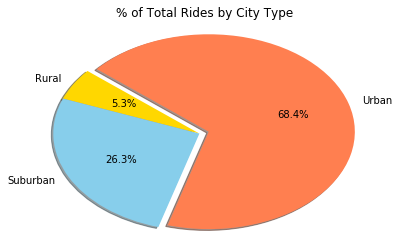

In [8]:
total_rides = data.groupby('type').count()
total_rides = total_rides['ride_id']
total_rides = total_rides.reset_index()
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(total_rides['ride_id'], explode=explode, labels=total_rides['type'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, radius = 1.5)
plt.title("% of Total Rides by City Type")
plt.axis("auto")
plt.savefig("Images/RidesPie.png")
plt.show()


## Total Drivers by City Type

In [9]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


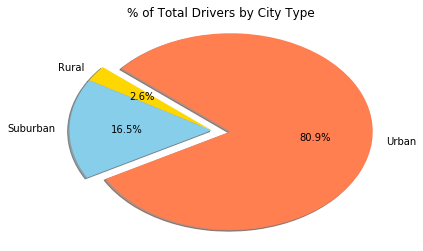

In [10]:
total_driver_group = data.groupby(['type','city']).mean()
total_driver_group = total_driver_group.reset_index()
total_drivers = total_driver_group.groupby('type').sum()
total_drivers = total_drivers['driver_count']
total_drivers = total_drivers.reset_index()
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.2)
total_drivers

plt.pie(total_drivers['driver_count'], explode=explode, labels=total_drivers['type'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, radius = 1.5)
plt.title("% of Total Drivers by City Type")
plt.axis("auto")
plt.savefig("Images/DriversPie.png")
plt.show()